# 1.1 파이썬 래퍼 XGBoost

## 기본세팅

In [37]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [39]:
#!pip install graphviz
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import plot_importance, to_graphviz
import graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

In [40]:
# CSV 파일 경로
file_path = 'combined_training.csv'

# CSV 파일을 데이터프레임으로 읽기
data_df = pd.read_csv(file_path)

# 데이터프레임 확인
print(data_df.head())

# 'site'와 'sid' 열 제거
data_df = data_df.drop(columns=['site', 'sid'])

# 피처와 레이블 분리 (여기서는 'target' 열을 레이블로 가정)
X_features = data_df.drop(columns='leaktype')
y_label = data_df['leaktype']

# 레이블 인코딩 (문자열을 숫자로 변환)
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y_label)

           site                 sid     ldate  lrate  llevel leaktype  0HZ  \
0  S-4687025030  S-0359369085120315  20200708     90     256      out    0   
1  S-4677025028  S-0359369083968368  20190601     90     542      out    0   
2  S-4673025027  S-0359369085133797  20201028     90     705      out    0   
3  S-4772025022  S-0359369084117593  20200505     90     499      out    0   
4  S-4729010102  S-0359369084010178  20200520     90     423      out    0   

   10HZ  20HZ  30HZ  ...  MAX10  MAX11  MAX12  MAX13  MAX14  MAX15  MAX16  \
0    18    19    16  ...   4690    243   4710    284   4700    324   4670   
1     4     2     4  ...    310    423    300    711    270    412    270   
2     0     0     3  ...    240    751    240    897    240    741    240   
3     2     2     2  ...    370    549    360    427    370    800    370   
4     3     3     3  ...    400    521    400    395    400    461    400   

   MAX17  MAX18  MAX19  
0    230   4710    260  
1    531    290   

In [41]:
# 데이터 분포 확인
print("클래스 이름:", label_encoder.classes_)
print("타겟 값 분포:\n", pd.Series(y_label).value_counts())

클래스 이름: ['in' 'noise' 'normal' 'other' 'out']
타겟 값 분포:
 normal    19704
out       17539
in        13273
other      7019
noise      5029
Name: leaktype, dtype: int64


In [42]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label_encoded, test_size=0.2, random_state=156)

# DMatrix 객체 생성
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

## 하이퍼파라미터 설정 

In [43]:
# 하이퍼파라미터 설정
params = {
    "max_depth": 3, 
    "eta": 0.1, 
    "objective": "multi:softprob",  # 다중 클래스 분류를 위한 목적 함수
    "eval_metric": "mlogloss",      # 다중 클래스 로그 손실 함수
    "num_class": len(label_encoder.classes_)  # 클래스 개수
}

num_rounds = 400  # 부스팅 반복 횟수

In [44]:
# 평가 목록
wlist = [(dtrain, "train"), (dtest, "eval")]

# 모델 학습
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)


[0]	train-mlogloss:1.50135	eval-mlogloss:1.50057
[1]	train-mlogloss:1.41529	eval-mlogloss:1.41436
[2]	train-mlogloss:1.34390	eval-mlogloss:1.34276
[3]	train-mlogloss:1.28337	eval-mlogloss:1.28207
[4]	train-mlogloss:1.23124	eval-mlogloss:1.22985
[5]	train-mlogloss:1.18548	eval-mlogloss:1.18403
[6]	train-mlogloss:1.14531	eval-mlogloss:1.14379
[7]	train-mlogloss:1.10982	eval-mlogloss:1.10825
[8]	train-mlogloss:1.07821	eval-mlogloss:1.07664
[9]	train-mlogloss:1.04984	eval-mlogloss:1.04824
[10]	train-mlogloss:1.02448	eval-mlogloss:1.02303
[11]	train-mlogloss:1.00169	eval-mlogloss:1.00036
[12]	train-mlogloss:0.98096	eval-mlogloss:0.97977
[13]	train-mlogloss:0.96226	eval-mlogloss:0.96133
[14]	train-mlogloss:0.94530	eval-mlogloss:0.94451
[15]	train-mlogloss:0.92979	eval-mlogloss:0.92910
[16]	train-mlogloss:0.91563	eval-mlogloss:0.91511
[17]	train-mlogloss:0.90234	eval-mlogloss:0.90206
[18]	train-mlogloss:0.89037	eval-mlogloss:0.89021
[19]	train-mlogloss:0.87907	eval-mlogloss:0.87916
[20]	train

[163]	train-mlogloss:0.59390	eval-mlogloss:0.61439
[164]	train-mlogloss:0.59341	eval-mlogloss:0.61396
[165]	train-mlogloss:0.59267	eval-mlogloss:0.61350
[166]	train-mlogloss:0.59184	eval-mlogloss:0.61277
[167]	train-mlogloss:0.59087	eval-mlogloss:0.61191
[168]	train-mlogloss:0.58997	eval-mlogloss:0.61117
[169]	train-mlogloss:0.58914	eval-mlogloss:0.61051
[170]	train-mlogloss:0.58823	eval-mlogloss:0.60967
[171]	train-mlogloss:0.58748	eval-mlogloss:0.60902
[172]	train-mlogloss:0.58691	eval-mlogloss:0.60849
[173]	train-mlogloss:0.58608	eval-mlogloss:0.60777
[174]	train-mlogloss:0.58505	eval-mlogloss:0.60694
[175]	train-mlogloss:0.58451	eval-mlogloss:0.60651
[176]	train-mlogloss:0.58398	eval-mlogloss:0.60603
[177]	train-mlogloss:0.58324	eval-mlogloss:0.60542
[178]	train-mlogloss:0.58229	eval-mlogloss:0.60453
[179]	train-mlogloss:0.58158	eval-mlogloss:0.60384
[180]	train-mlogloss:0.58093	eval-mlogloss:0.60334
[181]	train-mlogloss:0.58014	eval-mlogloss:0.60261
[182]	train-mlogloss:0.57935	ev

[324]	train-mlogloss:0.48958	eval-mlogloss:0.52480
[325]	train-mlogloss:0.48896	eval-mlogloss:0.52427
[326]	train-mlogloss:0.48834	eval-mlogloss:0.52371
[327]	train-mlogloss:0.48802	eval-mlogloss:0.52347
[328]	train-mlogloss:0.48768	eval-mlogloss:0.52318
[329]	train-mlogloss:0.48739	eval-mlogloss:0.52298
[330]	train-mlogloss:0.48708	eval-mlogloss:0.52273
[331]	train-mlogloss:0.48661	eval-mlogloss:0.52230
[332]	train-mlogloss:0.48616	eval-mlogloss:0.52191
[333]	train-mlogloss:0.48574	eval-mlogloss:0.52164
[334]	train-mlogloss:0.48527	eval-mlogloss:0.52128
[335]	train-mlogloss:0.48473	eval-mlogloss:0.52080
[336]	train-mlogloss:0.48435	eval-mlogloss:0.52049
[337]	train-mlogloss:0.48405	eval-mlogloss:0.52023
[338]	train-mlogloss:0.48368	eval-mlogloss:0.51984
[339]	train-mlogloss:0.48315	eval-mlogloss:0.51932
[340]	train-mlogloss:0.48263	eval-mlogloss:0.51884
[341]	train-mlogloss:0.48209	eval-mlogloss:0.51833
[342]	train-mlogloss:0.48153	eval-mlogloss:0.51790
[343]	train-mlogloss:0.48115	ev

## XGB 예측

In [45]:
# 예측 확률
pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_probs[:10], 3))

# 예측 분류
preds = np.argmax(pred_probs, axis=1)
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

predict() 수행 결과값 10개만 표시
[[0.    0.    1.    0.    0.   ]
 [0.227 0.005 0.    0.571 0.196]
 [0.083 0.125 0.    0.103 0.69 ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.257 0.018 0.    0.338 0.387]
 [0.267 0.087 0.    0.034 0.612]
 [0.623 0.01  0.    0.06  0.307]
 [0.334 0.283 0.    0.054 0.33 ]
 [0.417 0.035 0.    0.311 0.237]]
예측 분류 10개만 표시
[2 3 4 2 2 4 4 0 0 0]


## XGB 평가

In [46]:
# 성능 평가 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [47]:
get_clf_eval(y_test, pred=preds, pred_proba=pred_probs)

오차 행렬
[[1848   86    0   60  574]
 [ 116  754    0   45  101]
 [   0    0 4023    0    0]
 [ 198   92    0  738  376]
 [ 328   55    0   71 3048]]
정확도: 0.8320, 정밀도: 0.8346, 재현율: 0.8320, F1: 0.8285, AUC: 0.9616


## XGB 피처별 중요도

In [58]:
import matplotlib.font_manager as fm
fm._rebuild()

import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = "NanumGothic.ttf"  # 현재 시스템에 있는 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [57]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# NanumGothic 폰트 설정
font_path = "NanumGothic.ttf"  # 업로드한 폰트 파일 경로로 수정
font_prop = font_manager.FontProperties(fname=font_path)
font_name = font_prop.get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

print(f"설정된 폰트: {font_name}")

설정된 폰트: NanumGothic


설정된 폰트: NanumGothic


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

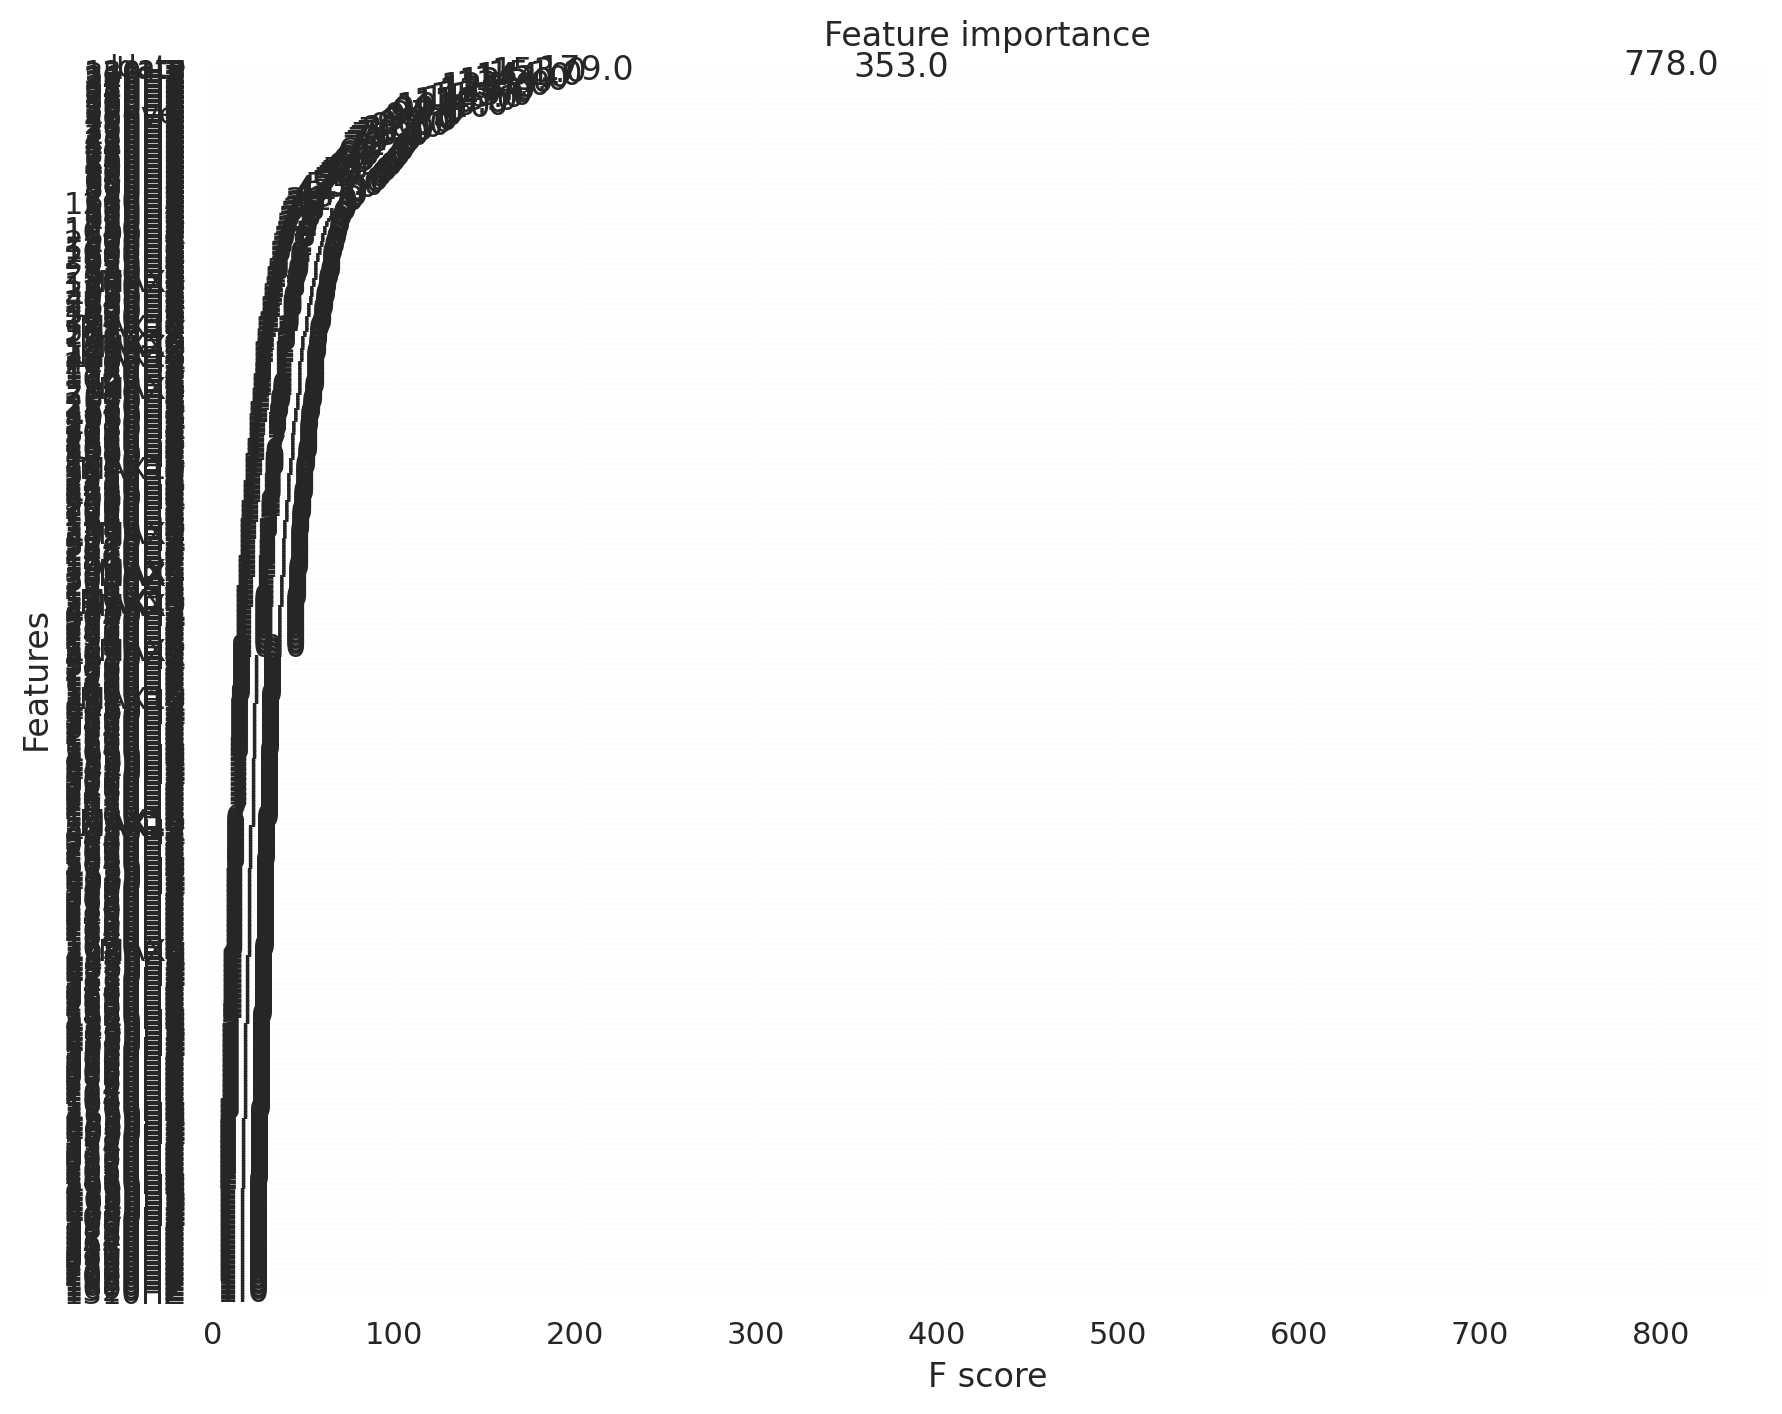

In [60]:
# 특성 중요도 시각화

# NanumGothic 폰트 설정
font_path = "NanumGothic.ttf"  # 업로드한 폰트 파일 경로로 수정

try:
    font_prop = font_manager.FontProperties(fname=font_path)
    font_name = font_prop.get_name()
    plt.rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False
    print(f"설정된 폰트: {font_name}")
except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("기본 폰트를 사용합니다.")

plot_importance(xgb_model)
plt.show()

## XGB 시각화 

In [50]:
graph = to_graphviz(xgb_model)
graph.render("xgboost_tree")  # 그래프를 파일로 저장

# 모델 구조 시각화
to_graphviz(xgb_model)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## XGB 교차검증 

In [51]:
# 교차 검증
cv_results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=10, nfold=3, metrics="mlogloss")
print(cv_results)

   train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0             1.501283            0.000357            1.501601   
1             1.415115            0.000561            1.415780   
2             1.343668            0.000777            1.344580   
3             1.283063            0.000915            1.284313   
4             1.230766            0.001031            1.232196   
5             1.185357            0.001006            1.187009   
6             1.145070            0.001265            1.146996   
7             1.109455            0.001464            1.111576   
8             1.077774            0.001646            1.080077   
9             1.049430            0.001806            1.051935   

   test-mlogloss-std  
0           0.000563  
1           0.001138  
2           0.001488  
3           0.001857  
4           0.002204  
5           0.002503  
6           0.002512  
7           0.002575  
8           0.002666  
9           0.002761  
